In [82]:
import requests
import math
import albumentations

from torch import long

def slope(x, y):
    sl = math.sqrt(x**2 + y**2)
    return sl

def get_ann(img_path,api_url) -> dict:
    headers = {"secret": "Boostcamp0000"}
    file_dict = {"file": open(img_path  , "rb")}
    response = requests.post(api_url, headers=headers, files=file_dict)
    return response.json()

path = '../Data set/real data/receipt/receipt211.jpg'

ann_dict = get_ann(path, "http://118.222.179.32:30000/ocr/")
annos = ann_dict['ocr']['word']

horizontal_list = []

for idx, anno in enumerate(annos):
    xlen = anno['points'][1][0] - anno['points'][0][0]
    # ylen = anno['points'][0][1] - anno['points'][1][1] # 음수일 수도 있음
    horizontal_list.append((xlen, idx))

longest = max(horizontal_list)[1]
print(annos[longest])

thetaplus = False
xlen = annos[longest]['points'][1][0] - annos[longest]['points'][0][0]
ylen = annos[longest]['points'][0][1] - annos[longest]['points'][1][1]

if ylen < 0 :
    thetaplus = True
    ylen = abs(ylen)

costheta = max(horizontal_list)[0] / slope(xlen, ylen)
theta = math.acos(costheta)
degree = round(theta * 57.3,2)
if thetaplus == True:
    degree = degree
else:
    degree = -degree

print(degree)

{'points': [[260, 479], [378, 495], [376, 508], [258, 492]], 'orientation': 'Horizontal', 'text': '현금영수증(소득공제)'}
7.72


In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

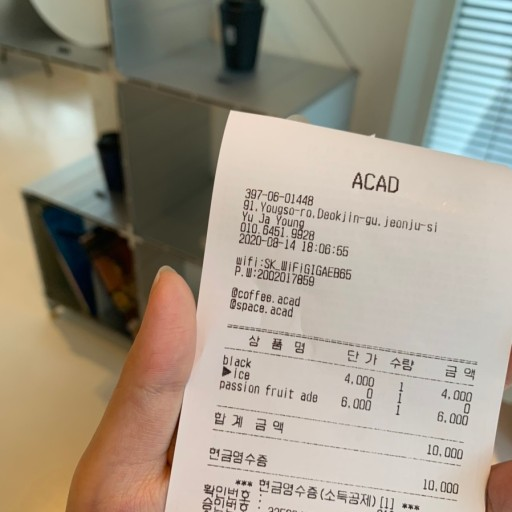

In [84]:
# 이미지 파일 불러오기
img = Image.open(path)
img.show()


/tmp/ipykernel_3301/1727655093.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  out = img.rotate(degree, resample=Image.BICUBIC, expand=True)


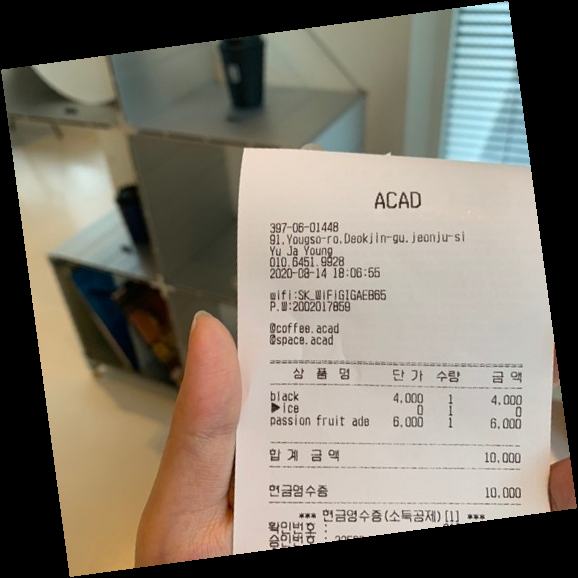

In [94]:
out = img.rotate(degree, resample=Image.BICUBIC, expand=True)
out

In [92]:
out.save('rotate-output.png')